# K-Nearest Neighbour


* Analyze the data
* Print at least one of each different number from the MNIST dataset
* Create and analyze a confusion matrix 
* Create your own  KNN algorithm

Importing the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

test1 = pd.read_csv("../../Datasets/test_sample.csv")
train1 = pd.read_csv("../../Datasets/train_sample.csv")

test2 = pd.read_csv("../../Datasets/test_sample_2.csv")
train2 = pd.read_csv("../../Datasets/train_sample_2.csv")

## Dataset 1 overview

In [2]:
test1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape and test/train split of dataset 1

In [3]:
print(test1.shape)
print(train1.shape)

print(f"Test split: {len(test1)/(len(test1)+len(train1))}")

(1000, 785)
(5000, 785)
Test split: 0.16666666666666666


Checking whether data is missing:

In [4]:
print(test1.isnull().values.any())
print(train1.isnull().values.any())

False
False


Checking if there are any duplicated rows

In [4]:
print(test1.duplicated().sum())
print(train1.duplicated().sum())

0
0


Comparison of the attributes:

The columns in the dataset are the same.

In [3]:
test1_pixels = test1.columns

train1_pixels = train1.columns

missing_pixels1 = [test1_pixels for test1_pixels in test1_pixels if test1_pixels not in train1_pixels]
print(missing_pixels1)

[]


## Dataset 2 overview


Shape of the datasets.

The test dataset contains 3 more rows than the training dataset.

In [7]:
test2.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(test2.shape)
print(train2.shape)

print(f"Test split: {len(test1)/(len(test1)+len(train1))}")

(1000, 785)
(5000, 782)
Test split: 0.16666666666666666


The training set is missing 3pixels: ['pixel781', 'pixel782', 'pixel783']

In [9]:
test2_pixels = test2.columns

train2_pixels = train2.columns

missing_pixels2 = [test2_pixels for test2_pixels in test2_pixels if test2_pixels not in train2_pixels]
print(f"pixels not found in trainingset: {missing_pixels2}")

pixels not found in trainingset: ['pixel781', 'pixel782', 'pixel783']


The datasets do not contain any duplicates

In [10]:
print(test2.duplicated().sum())
print(train2.duplicated().sum())

0
0


The datasets do not have any missing data

In [11]:
print(test2.isnull().values.any())
print(train2.isnull().values.any())

False
False


## Conclusion:

Since the 2nd dataset is missing 3 pixels in the training data, therefore i will work with the first dataset.

The dataset contains images of numbers with the size of 28x28 pixels

The column "Label" contains the numbers that are depicted by the pixels and varies from 0-9, therefore there are 10 classes.

There are 100 testing datasamples for each number and 500 training datasamples totaling in at 1000 samples in the testdataset and 5000 samples in the trainingdataset

#### Finding the possible numbers that are depicted in the images

In [21]:
print(test1['label'].unique())
print(train1['label'].unique())


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### Histogram of the "number" distribution in the testdataset

The amount of rows with the label 0 is 100 in the testset

The amount of rows with the label 1 is 100 in the testset

The amount of rows with the label 2 is 100 in the testset

The amount of rows with the label 3 is 100 in the testset

The amount of rows with the label 4 is 100 in the testset

The amount of rows with the label 5 is 100 in the testset

The amount of rows with the label 6 is 100 in the testset

The amount of rows with the label 7 is 100 in the testset

The amount of rows with the label 8 is 100 in the testset

The amount of rows with the label 9 is 100 in the testset



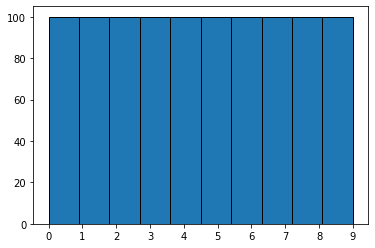

In [5]:
for i in test1['label'].unique():
    row_amount = len(test1[test1['label'] == i])
    print(f"The amount of rows with the label {i} is {row_amount} in the testset\n")


plt.hist(test1['label'], edgecolor = 'k')
ax = plt.gca()
x_range = list(range(test1['label'].unique().max()+1))
ax.set_xticks(x_range)
ax.set_xticklabels(x_range)
plt.show()


#### Histogram of the "number" distribution in the trainingdataset

The amount of rows with the label 0 is 500 in the trainingset

The amount of rows with the label 1 is 500 in the trainingset

The amount of rows with the label 2 is 500 in the trainingset

The amount of rows with the label 3 is 500 in the trainingset

The amount of rows with the label 4 is 500 in the trainingset

The amount of rows with the label 5 is 500 in the trainingset

The amount of rows with the label 6 is 500 in the trainingset

The amount of rows with the label 7 is 500 in the trainingset

The amount of rows with the label 8 is 500 in the trainingset

The amount of rows with the label 9 is 500 in the trainingset



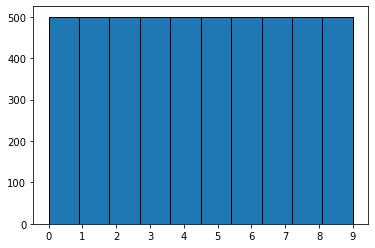

In [6]:
for i in train1['label'].unique():
    row_amount = len(train1[train1['label'] == i])
    print(f"The amount of rows with the label {i} is {row_amount} in the trainingset\n")
plt.hist(train1['label'], edgecolor = 'k')
ax = plt.gca()


x_range = list(range(test1['label'].unique().max()+1))
ax.set_xticks(x_range)
ax.set_xticklabels(x_range)
plt.show()

# Printing images, one of each number.

The images are taken from the training data, specifically the first occurence of each number

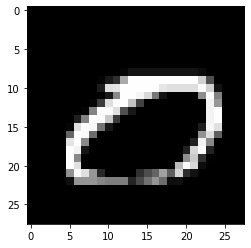

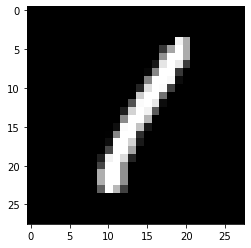

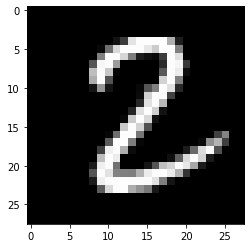

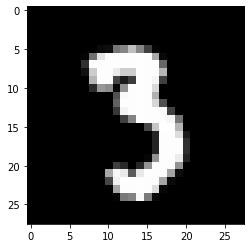

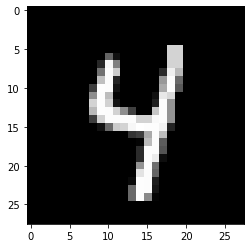

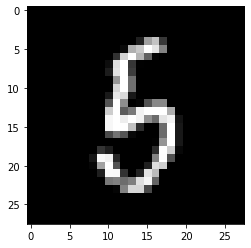

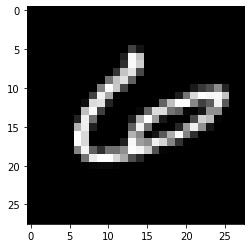

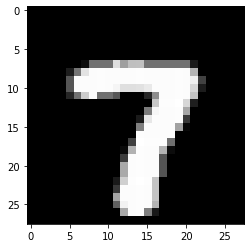

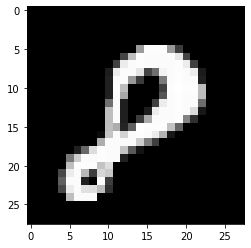

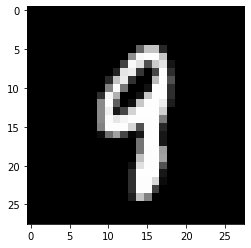

<Figure size 432x288 with 0 Axes>

In [7]:
numbers_to_print = train1['label'].unique()

images = []

#Creating a list containing the pixels for each image
for i in numbers_to_print:
    
    #Finding the first label in the dataframe that matches one of the unique labels and extracting rows with that label
    image_to_print = train1[train1['label'] == i]
    
    #removing the label, leaving only pixel values in the dataframe rows that has been extracted
    image_to_print = image_to_print.drop(columns = ['label'])
    
    #Extracting the first of these rows
    image_to_print = image_to_print.iloc[0]
    
    #Formatting of array to a printable version
    image_to_print_array = image_to_print.to_numpy()
    image_to_print_array = image_to_print_array.reshape(28,28)
    images.append(image_to_print_array)
    
#Going through the list of pixels of the images and printing these
for i in range(len(images)):
    img = plt.imshow(images[i],cmap ="gray")
    plt.figure()


# Training a KNN

Using the default settings for the KNN classifier, we have 5 neighbors for each point. This results in a testscore of 0.945

Testscore: 0.945


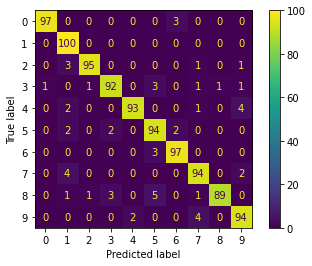

Images that have been wrongly classified can be seen below.
    location  predicted_value  actual_value
0         63                6             0
1         83                6             0
2         97                6             0
3        224                7             2
4        246                1             2
5        256                9             2
6        286                1             2
7        294                1             2
8        318                5             3
9        323                9             3
10       350                0             3
11       352                8             3
12       358                7             3
13       369                2             3
14       371                5             3
15       383                5             3
16       406                1             4
17       410                9             4
18       423                7             4
19       432                9             4
20       439    

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Creating the classifier
knn_clf = KNeighborsClassifier()

#preparing datasets
X_train = train1.drop(columns = ['label'])
y_train = train1['label']

X_test = test1.drop(columns = ['label'])
y_test = test1['label']

#Creating the model
knn_clf.fit(X_train,y_train)

#Presentation of results
print(f"Testscore: {knn_clf.score(X_test,y_test)}")

y_pred = knn_clf.predict(X_test)
knn_cm = confusion_matrix(y_test,y_pred)

labels = train1['label'].unique()

cm_disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = labels)
cm_disp.plot()
plt.show()

#Comparison of actual values to predicted value
y_predicted_values = knn_clf.predict(X_test)

actual_value = y_test
predicted_value = y_predicted_values

headers = ['predicted values', 'actual values']

#Creating a dataframe for comparison of predicted values vs actual values
prediction_frame = pd.DataFrame([predicted_value,actual_value])
prediction_frame = prediction_frame.transpose()

prediction_frame.columns = headers

actual_value = []
predicted_value = []
location = []

print("Images that have been wrongly classified can be seen below.")
#Making the comparison between actual values and predicted values
for i in range(1000):
    if (prediction_frame['predicted values'][i] != prediction_frame['actual values'][i]):
        location.append(i)
        actual_value.append(prediction_frame['actual values'].iloc[i])
        predicted_value.append(prediction_frame['predicted values'].iloc[i])
headers_new = ['location','predicted_value','actual_value']

prediction_frame_summary = pd.DataFrame([location,predicted_value,actual_value])
prediction_frame_summary = prediction_frame_summary.transpose()

prediction_frame_summary.columns = headers_new
print(prediction_frame_summary)

## Trying different combinations with GridSearchCV.

This process is very very time consuming.

'kd_tree' with only 5 values in the neighbor_list and just 1 leaf size takes: 2minutes 15seconds
'ball_tree' with only 5 values in the neighbor_list and just 1 leaf size takes: 1minutes 38seconds
'brute' with only  5 values in the neighbor_list takes: 5min 49seconds (leaf size is not applicable to this algorithm)

The best result was produced with the settings:



In [28]:
%%time


from sklearn.model_selection import GridSearchCV

#The square root of the number of test datapoints is commonly used as a starting number of neighbors if the default value is not used.
n_start = int(np.sqrt(test1.shape[0]).round())

knn_clf_grid = KNeighborsClassifier()

#Parameters to be tested
n_neighbor_list = [3,5,10,15, n_start]
algorithm_list = ['brute','kd_tree','ball_tree']
leaf_size_list = [5,10,15,20]
p_list = [1,2] # 1 = Manhattan, 2 = Euclidean
params = {
    'n_neighbors': n_neighbor_list,
    'algorithm': algorithm_list,
    'leaf_size': leaf_size_list,
    'p': [1]
}

#Reducing the numbers of cross-validations to speed up the process...
best_params = GridSearchCV(estimator = knn_clf_grid, param_grid = params, cv = 3)



best_params.fit(X_train, y_train)



knn_result_frame = pd.DataFrame(best_params.cv_results_)

knn_result_frame.head()

knn_result_frame.nsmallest(5,"rank_test_score")

Wall time: 19min 36s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.022326,0.002630,23.234517,1.154683,brute,10,32,1,"{'algorithm': 'brute', 'leaf_size': 10, 'n_nei...",0.862028,0.856029,0.87395,0.864002,0.007448,25
9,0.017334,0.000470,23.145350,0.637819,brute,15,32,1,"{'algorithm': 'brute', 'leaf_size': 15, 'n_nei...",0.862028,0.856029,0.87395,0.864002,0.007448,25
14,0.784353,0.010349,9.647927,0.024433,kd_tree,10,32,1,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.862028,0.856029,0.87395,0.864002,0.007448,25
19,0.705650,0.013985,7.614333,0.073467,kd_tree,15,32,1,"{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_n...",0.862028,0.856029,0.87395,0.864002,0.007448,25
24,0.485996,0.009904,6.742064,0.137632,ball_tree,10,32,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.862028,0.856029,0.87395,0.864002,0.007448,25
29,0.436001,0.002914,6.211888,0.037886,ball_tree,15,32,1,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.862028,0.856029,0.87395,0.864002,0.007448,25
3,0.020306,0.001682,23.342027,0.190793,brute,10,15,1,"{'algorithm': 'brute', 'leaf_size': 10, 'n_nei...",0.893821,0.886023,0.89916,0.893001,0.005394,19
8,0.018013,0.001430,23.090369,0.537987,brute,15,15,1,"{'algorithm': 'brute', 'leaf_size': 15, 'n_nei...",0.893821,0.886023,0.89916,0.893001,0.005394,19
13,0.799001,0.013636,9.592439,0.030764,kd_tree,10,15,1,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.893821,0.886023,0.89916,0.893001,0.005394,19
18,0.706544,0.011305,7.625465,0.034052,kd_tree,15,15,1,"{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_n...",0.893821,0.886023,0.89916,0.893001,0.005394,19


## Function to get the "K" closest neighbors to a prediction.

The predicted number is: [5]
An image of the predicted sample is shown here:


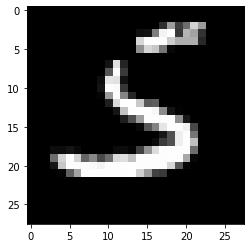

Neighbor 1, image number 2781:


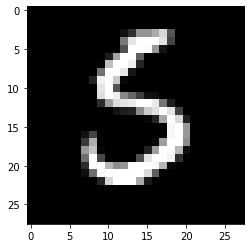

<Figure size 432x288 with 0 Axes>

Neighbor 2, image number 2783:


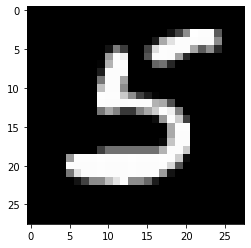

<Figure size 432x288 with 0 Axes>

Neighbor 3, image number 2867:


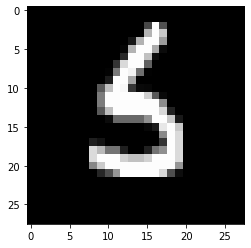

<Figure size 432x288 with 0 Axes>

Neighbor 4, image number 2786:


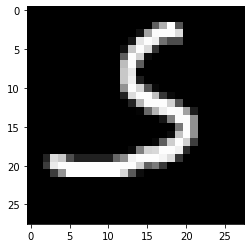

<Figure size 432x288 with 0 Axes>

Neighbor 5, image number 2636:


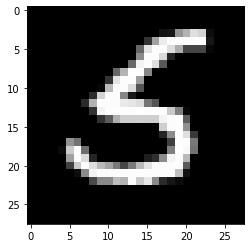

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#Set amount of neighbors to look for.
Number_of_neighbors = 5
#Create KNN-classifier
knn_clf = KNeighborsClassifier(n_neighbors = Number_of_neighbors)

#Create KNN-model from training data.
knn_clf.fit(X_train,y_train)

#Choose the location of the sample to test in the testdataset (0-999)
test_loc = 505

#The sample which will be of shape (784,) and has to be reshaped.
sample_info = X_test.iloc[test_loc]

#Reshaping sample to 1 row of 784 columns. reshape(row,column). reshape(1,-1) means that 1 row will be created and -1 means that 
# X columns to fit all data will be created. In this case (1*X) = 784, X = 784 meaning 784 columns will be created.
sample_info = sample_info.array.reshape(1,-1)


#Predicting the value of the chosen sample
prediction_n = knn_clf.predict(sample_info)

print(f"The predicted number is: {prediction_n}\nAn image of the predicted sample is shown here:")

#Reshape the 1x784 to a 28x28 array containing pixel-values
img_of_prediction = sample_info.reshape(28,28)
#Draw the image based on the pixel in the array
img = plt.imshow(img_of_prediction,cmap ="gray")
plt.show()

#Function to find the samples nearest neighbor and return the location of these in the training dataset
def findNeighbors(location:int) -> list:
    neighbors = knn_clf.kneighbors(location, return_distance = False)
    return neighbors[0]

#Function to print the neighbors found in the "findNeighbors function"
def imgOfNeighbors(neighborsList:list) -> None:
    j=1
    for i in neighborsList:
        #get image info, this can be reshaped instantly since we are only using the array to produce the image
        img_info = X_train.iloc[i]
        img_info = img_info.array.reshape(28,28)
        img_show = plt.imshow(img_info,cmap ="gray")
        print(f"Neighbor {j}, image number {i}:")
        plt.figure()
        plt.show()
        j=j+1
        
neighbor_list = findNeighbors(sample_info)

imgOfNeighbors(neighbor_list)

# VG-Del.

Creating the KNN:

The testscore is a bit worse than the testscore in the first part of the assignment(0.942 vs 0.945). This KNN also takes longer to run, even when the KNN is set to 'brute' in the previous parts of this notebook(30sec vs ~1sec). 

Two different calculations of the distances between the point to be predicted and its neighbors are available, "Euclidean" and "Manhattan". "Euclidean" results in a more accurate prediction.

The most difficult values to predict are 3s and 8s. which are both often wrongly classified as 5's, this is true for both the sklearn KNN and the selfmade KNN. 

Both of the KNN can perfectly predict images of the number "1" and perform very similarly overall. Below are images of the confusion matrices for the selfmade and the sklearn KNN-classifier. 

The prediction for 8's is where the most difference in predictions can be seen. The selfmade KNN almost always predicts 8's as 5's when it predicts wrong whereas SKLearn has a more even split between 3s and 5s.

The reason for specifically 8s and 3s being wrongly classified is most likely due to their shape. These numbers have a "center part" and rounded outer parts and since the numbers on the images are sometimes angled (as can be seen in the printing of number 6 and 8) 

Selfmade:
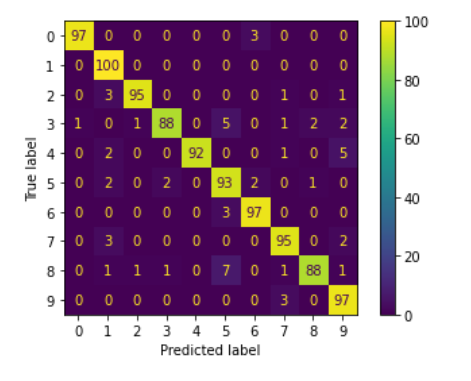

SKLearn:

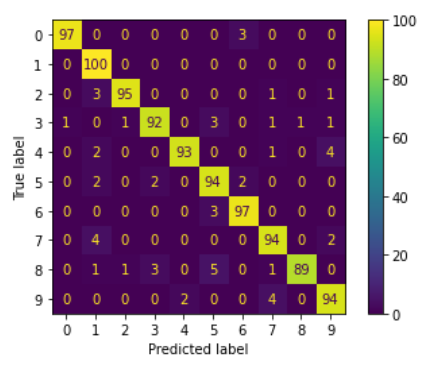

### Selfmade KNN to predict label of given images.

The majority of the runtime is due to the subtraction, squaring and sum of the distances. 

The time complexity for the KNN is:

O(N) for the finding neighbors function. Inside this function there are sum,sub and pow which are related to the column count, K. This results in a time complexity of O(K * N) = O(K) 


O(N^2) for getting predictions (decided by the amount of neighbors and will therefore be small compared to the total amount of loops in the neighbors function)

Which should result in the overall complexity of O(N^2), however for small neighbor settings the time to process the O(K* N) function will be the most time consuming one.

1.0
findNeighbor time : 63.75 seconds
getPrediction time : 0.07 seconds
correct: 941
values: 1000
Score: 0.941


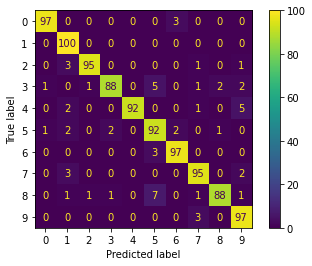

Images that have been wrongly classified: 
    location  predicted_value  actual_value
0         63                6             0
1         83                6             0
2         97                6             0
3        224                7             2
4        246                1             2
5        256                9             2
6        286                1             2
7        294                1             2
8        318                5             3
9        323                9             3
10       350                0             3
11       352                8             3
12       354                8             3
13       358                7             3
14       359                5             3
15       369                2             3
16       371                5             3
17       383                5             3
18       386                5             3
19       394                9             3
20       406                1    

In [14]:
%%time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## Vill summera euklidiska avståndet för varje punkt som finns i arrayen av datapun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter

test1 = pd.read_csv("../../Datasets/test_sample.csv")
train1 = pd.read_csv("../../Datasets/train_sample.csv")

X_train = train1.drop(columns = ['label'])
y_train = train1['label']

X_test = test1.drop(columns = ['label'])
y_test = test1['label']


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Select input variables:
n_neighbors = 5

X_test = pd.DataFrame(X_test)

X_train=pd.DataFrame(X_train)
#Viable options: "Manhatten" and "Euclidean"
distance_type = "Euclidean"

#KNN-funktion

def KNN_Predictor(X_test, X_train, n_neighbors, y_train, algorithm:str) -> list:
    
    
    #Returns a X_test X N_neighbor shape. Eg 1000x3 for 1000 test values and 3 neighbors.
    if algorithm == 'Manhattan':
        start = time.time()
        closest_neighbor_index = findNeighborsManhattan(X_test,X_train,n_neighbors)
        print(f"findNeighbor time : {(time.time()-start):.2f} seconds")
    elif algorithm == 'Euclidean':
        start = time.time()
        closest_neighbor_index = findNeighborsEuclidean(X_test,X_train,n_neighbors)
        print(f"findNeighbor time : {(time.time()-start):.2f} seconds")
    start = time.time()
    predictions = getPredictions(closest_neighbor_index,y_train)
    print(f"getPrediction time : {(time.time()-start):.2f} seconds")
    return predictions


def getMostCommon(list_of_predictions):
    pred_values = Counter(list_of_predictions)
    most_occuring = pred_values.most_common(1)

    return most_occuring[0][0]

def findNeighborsManhattan(X_test_data, X_train, n_neighbor:int) -> list:
    shortest_dist_index = []
    for i in range(X_test_data.shape[0]):

        X_train_data_sub = X_train.sub(X_test_data.iloc[i], axis ='columns')
        X_train_data_sub_pow = X_train_data_sub.abs()
        X_test_data_sum = X_train_data_sub_pow.sum(axis = 'columns')


        closest_neighbor_df = X_test_data_sum.nsmallest(n_neighbor)

        closest_neighbor = list(closest_neighbor_df.index.values)
        shortest_dist_index.append(closest_neighbor)

    return shortest_dist_index

#Note: Changing the distance calc to squared euclidean has very little impact on performance and no impact on the predicted value
def findNeighborsEuclidean(X_test_data, X_train, n_neighbor:int) -> list:
    shortest_dist_index = []
    for i in range(X_test_data.shape[0]):
        
        X_train_data_sub = X_train.sub(X_test_data.iloc[i], axis ='columns')
        X_train_data_sub_pow = X_train_data_sub.pow(2)
        X_test_data_sum = X_train_data_sub_pow.sum(axis = 'columns')
        X_test_data_sum=np.sqrt(X_test_data_sum)
        
        closest_neighbor_df = X_test_data_sum.nsmallest(n_neighbor)
        closest_neighbor = list(closest_neighbor_df.index.values)
        shortest_dist_index.append(closest_neighbor)
        
    return shortest_dist_index


#Fetching the labels from the index-values produced in the findNeighbor function
def getPredictions(closest_neighbor_index, y_train) -> list:
    all_pred = []
    for i in range(len(closest_neighbor_index)):
        predictions = []
        for k in closest_neighbor_index[i]:
            predictions.append(y_train.iloc[k])
            prediction = getMostCommon(predictions)
        all_pred.append(prediction)
    return all_pred

#List of predictions for all test_data
prediction_list = KNN_Predictor(X_test, X_train, n_neighbors, y_train, distance_type)

#Converting prediction array to dataframe
pred_df = pd.DataFrame(prediction_list, columns = ['prediction'])

y_pred = pred_df.to_numpy()
#Converting the real test values to dataframe
y_test_df = y_test.to_frame()

#Creating a dataframe for comparison between prediction and real values
summary_df = pd.concat([y_test_df,pred_df], axis = 1, join = "inner")


summary_df['Duplicated'] = np.where(summary_df['label'] == summary_df['prediction'], 1,0)

amountofcorrect = summary_df['Duplicated'].sum()

total_values_to_predict = summary_df.shape[0]
print(f"correct: {amountofcorrect}")
print(f"values: {total_values_to_predict}")
print(f"Score: {amountofcorrect/total_values_to_predict}")

knn_cm = confusion_matrix(y_test,y_pred)

labels = train1['label'].unique()

cm_disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = labels)
cm_disp.plot()
plt.show()


print("Images that have been wrongly classified: ")
actual_value = []
predicted_value = []
location = []
for i in range(1000):
    if (summary_df['label'][i] != summary_df['prediction'][i]):
        location.append(i)
        actual_value.append(summary_df['label'].iloc[i])
        predicted_value.append(summary_df['prediction'].iloc[i])
headers = ['location','predicted_value','actual_value']

prediction_frame = pd.DataFrame([location,predicted_value,actual_value])
prediction_frame = prediction_frame.transpose()

prediction_frame.columns = headers
print(prediction_frame)


## Checking the images of incorrectly classified images.

Requires the previous cell to be run first.

Image_to_check can be set to the location value above to se the actual value of the image coming from the testdataset.

Predicted value : 5


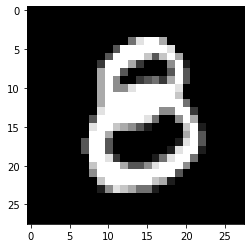

<Figure size 432x288 with 0 Axes>

In [99]:
Image_to_check = 867

predicted_val = (summary_df['prediction'].iloc[Image_to_check])
img_info = X_test.iloc[Image_to_check]
img_info = img_info.array.reshape(28,28)
img_show = plt.imshow(img_info,cmap ="gray")
print(f"Predicted value : {predicted_val}")
plt.figure()
plt.show()